# Load and View Data Shape

In [28]:
import os
import cv2
import numpy as np

# Define the main folder containing 'test', 'train', and 'Val' subfolders
main_folder = r"D:\xtray_images\x-tray_images\chest_xray\chest_xray"

# Define the subfolders and their corresponding classes
subfolders = ['test', 'train', 'Val']
classes = ['NORMAL', 'PNEUMONIA']

# Initialize empty lists to store images and labels
all_images = []
all_labels = []

# Loop through each subfolder and class
for subfolder in subfolders:
    for class_name in classes:
        folder_path = os.path.join(main_folder, subfolder, class_name)
        
        # Loop through the image files in the current class folder
        for filename in os.listdir(folder_path):
            if filename.endswith(".jpeg") or filename.endswith(".jpg"):
                image_path = os.path.join(folder_path, filename)
                
                # Load and resize the image (you can resize to a desired size)
                image = cv2.imread(image_path)
                image = cv2.resize(image, (224, 224))  # Example resizing to 224x224
                
                # Append the image to the list
                all_images.append(image)
                
                # Append the label (0 for NORMAL, 1 for PNEUMONIA)
                label = 0 if class_name == 'NORMAL' else 1
                all_labels.append(label)

# Convert the lists to NumPy arrays
images_array = np.array(all_images)
labels_array = np.array(all_labels)

# Print the shapes of the arrays
print("Images shape:", images_array.shape)
print("Labels shape:", labels_array.shape)


Images shape: (5856, 224, 224, 3)
Labels shape: (5856,)


# View Class Shape

In [34]:
# Find the indices of normal images (where label is 0)
normal_indices = np.where(labels_array == 0)

# Find the indices of pneumonia images (where label is 1)
pneumonia_indices = np.where(labels_array == 1)

# Get the normal and pneumonia images using the indices
normal_images = images_array[normal_indices]
pneumonia_images = images_array[pneumonia_indices]

# Print the shapes of the normal and pneumonia image arrays
print("Shape of normal images:", normal_images.shape)
print("Shape of pneumonia images:", pneumonia_images.shape)

Shape of normal images: (1583, 224, 224, 3)
Shape of pneumonia images: (4273, 224, 224, 3)


# Exploratory Data Analysis (EDA)

## Calculate basic statistics for normal pneumonia images
To compute basic statistics for the medical image data, we can calculate statistics such as the mean, standard deviation, minimum, and maximum pixel values. Let's calculate these statistics for both normal and pneumonia images:

In [35]:
# Calculate basic statistics for normal images
normal_mean = np.mean(normal_images)
normal_std = np.std(normal_images)
normal_min = np.min(normal_images)
normal_max = np.max(normal_images)

# Calculate basic statistics for pneumonia images
pneumonia_mean = np.mean(pneumonia_images)
pneumonia_std = np.std(pneumonia_images)
pneumonia_min = np.min(pneumonia_images)
pneumonia_max = np.max(pneumonia_images)

# Print the statistics
print("Statistics for Normal Images:")
print(f"Mean: {normal_mean:.2f}")
print(f"Standard Deviation: {normal_std:.2f}")
print(f"Minimum Pixel Value: {normal_min}")
print(f"Maximum Pixel Value: {normal_max}")

print("\nStatistics for Pneumonia Images:")
print(f"Mean: {pneumonia_mean:.2f}")
print(f"Standard Deviation: {pneumonia_std:.2f}")
print(f"Minimum Pixel Value: {pneumonia_min}")
print(f"Maximum Pixel Value: {pneumonia_max}")

Statistics for Normal Images:
Mean: 122.53
Standard Deviation: 62.93
Minimum Pixel Value: 0
Maximum Pixel Value: 255

Statistics for Pneumonia Images:
Mean: 122.75
Standard Deviation: 59.62
Minimum Pixel Value: 0
Maximum Pixel Value: 255


## Histogram Analysis
Histogram analysis can provide valuable insights into the pixel intensity distribution of the image data. Here's how you can perform histogram analysis for both normal and pneumonia images using Python and the Matplotlib library

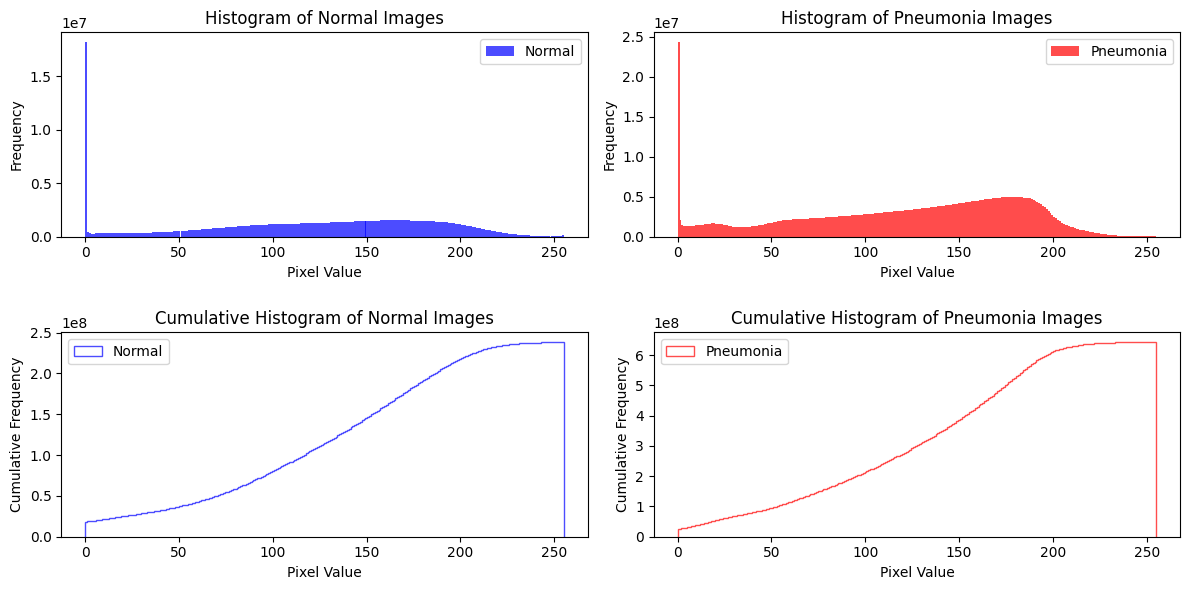

In [36]:
import matplotlib.pyplot as plt

# Create histograms for normal and pneumonia images
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.hist(normal_images.ravel(), bins=256, color='blue', alpha=0.7, label='Normal')
plt.title('Histogram of Normal Images')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(2, 2, 2)
plt.hist(pneumonia_images.ravel(), bins=256, color='red', alpha=0.7, label='Pneumonia')
plt.title('Histogram of Pneumonia Images')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(2, 2, 3)
plt.hist(normal_images.ravel(), bins=256, color='blue', alpha=0.7, label='Normal', cumulative=True, histtype='step')
plt.title('Cumulative Histogram of Normal Images')
plt.xlabel('Pixel Value')
plt.ylabel('Cumulative Frequency')
plt.legend()

plt.subplot(2, 2, 4)
plt.hist(pneumonia_images.ravel(), bins=256, color='red', alpha=0.7, label='Pneumonia', cumulative=True, histtype='step')
plt.title('Cumulative Histogram of Pneumonia Images')
plt.xlabel('Pixel Value')
plt.ylabel('Cumulative Frequency')
plt.legend()

plt.tight_layout()
plt.show()

# Data Visualization

## Class Distribution
Data visualization is essential for gaining insights into the medical image dataset. we can use various visualization techniques to understand the distribution of classes, sample images, and other aspects of the data. Here's how to perform data visualization on the chest X-ray dataset using Python and Matplotlib:

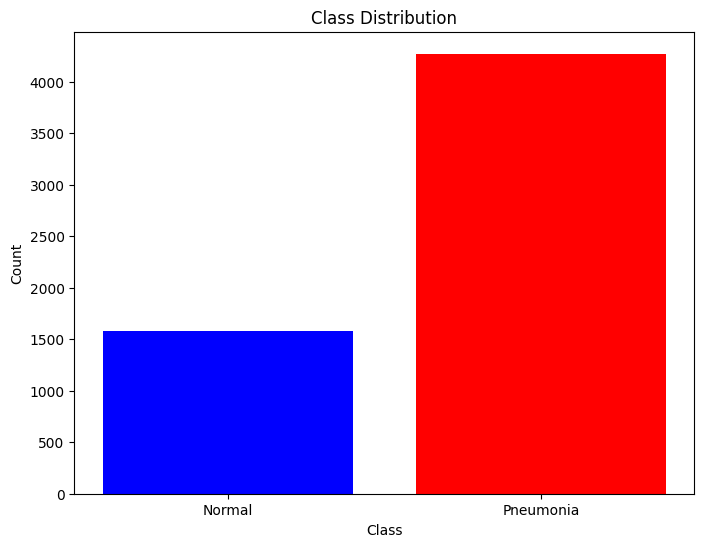

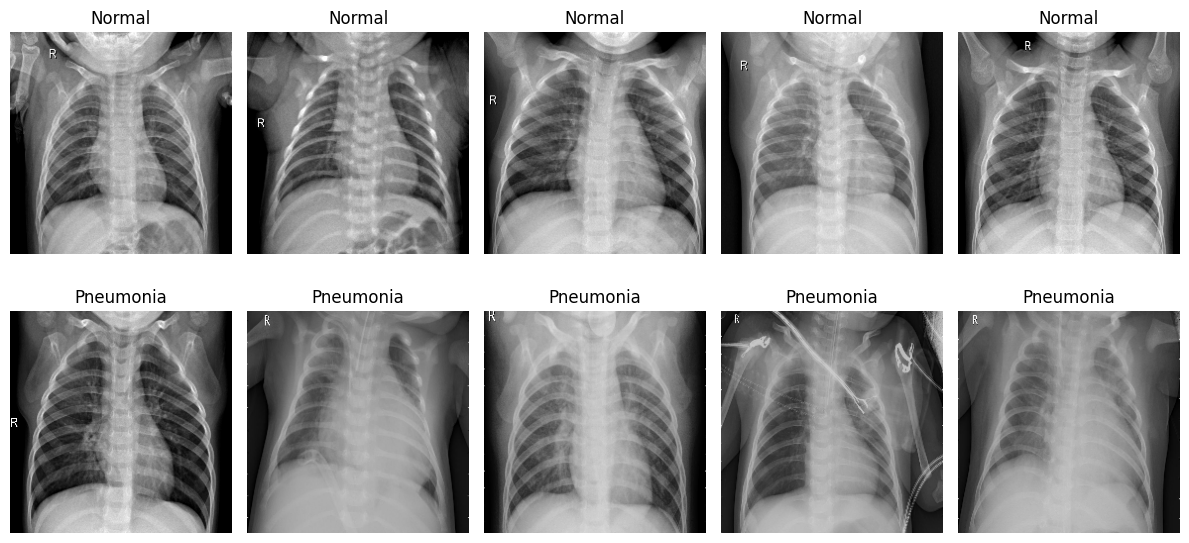

In [37]:
import random
# Define class labels and counts
class_labels = ['Normal', 'Pneumonia']
class_counts = [len(normal_images), len(pneumonia_images)]

# Plot a bar chart to visualize class distribution
plt.figure(figsize=(8, 6))
plt.bar(class_labels, class_counts, color=['blue', 'red'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Visualize random sample images from both classes
num_samples = 5  # Number of samples to display
plt.figure(figsize=(12, 6))
for i in range(num_samples):
    plt.subplot(2, num_samples, i + 1)
    random_normal_image = random.choice(normal_images)
    plt.imshow(random_normal_image, cmap='gray')
    plt.title('Normal')
    plt.axis('off')

    plt.subplot(2, num_samples, i + num_samples + 1)
    random_pneumonia_image = random.choice(pneumonia_images)
    plt.imshow(random_pneumonia_image, cmap='gray')
    plt.title('Pneumonia')
    plt.axis('off')

plt.tight_layout()
plt.show()

## Sample Image Display
Let's display random sample images from both the 'NORMAL' and 'PNEUMONIA' classes:

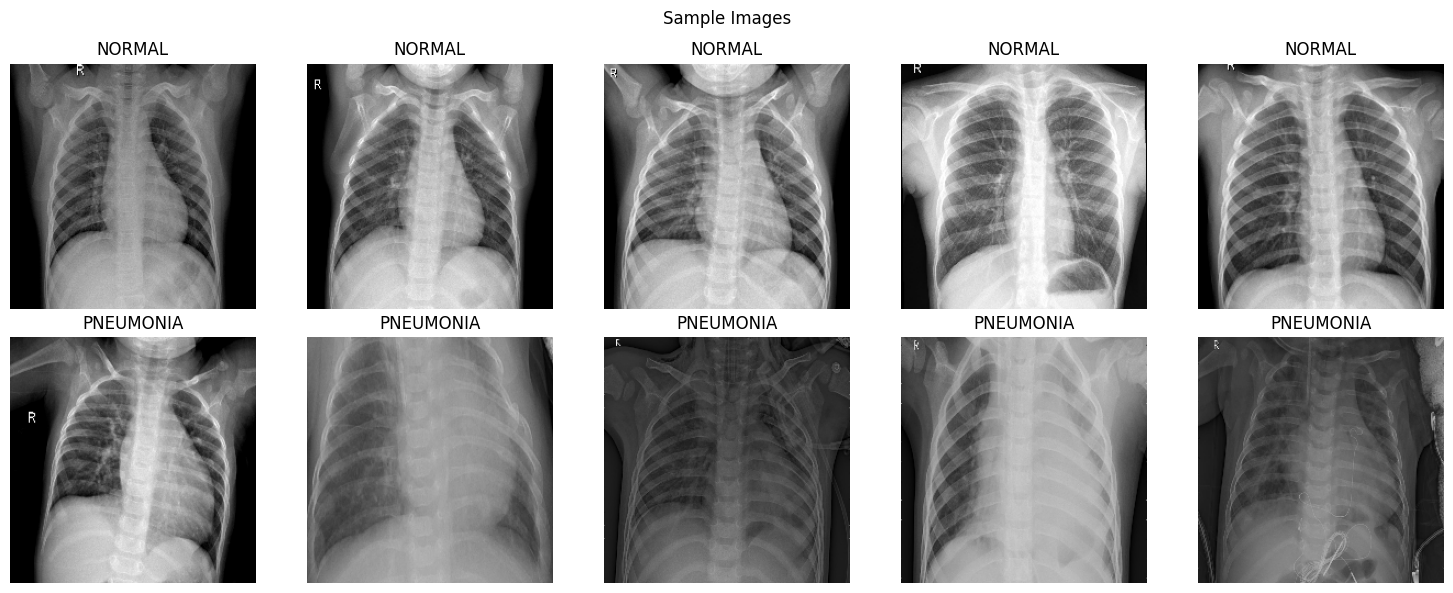

In [38]:
# Define the number of sample images to display
num_samples = 5

# Create a figure with subplots to display the sample images
plt.figure(figsize=(15, 6))
plt.suptitle('Sample Images')

# Display random sample images from the 'NORMAL' class
for i in range(num_samples):
    plt.subplot(2, num_samples, i + 1)
    random_normal_image = random.choice(normal_images)
    plt.imshow(random_normal_image, cmap='gray')
    plt.title('NORMAL')
    plt.axis('off')

# Display random sample images from the 'PNEUMONIA' class
for i in range(num_samples):
    plt.subplot(2, num_samples, num_samples + i + 1)
    random_pneumonia_image = random.choice(pneumonia_images)
    plt.imshow(random_pneumonia_image, cmap='gray')
    plt.title('PNEUMONIA')
    plt.axis('off')

plt.tight_layout()
plt.show()


# Data augmentation 
Data augmentation is a technique used to artificially increase the size of our dataset by applying various transformations to our existing images. This can help improve the performance and generalization of machine learning models. In the context of medical image data, we should apply data augmentation techniques carefully on the medical data. Here's how to perform data augmentation on the chest X-ray dataset using Python and the open-cv

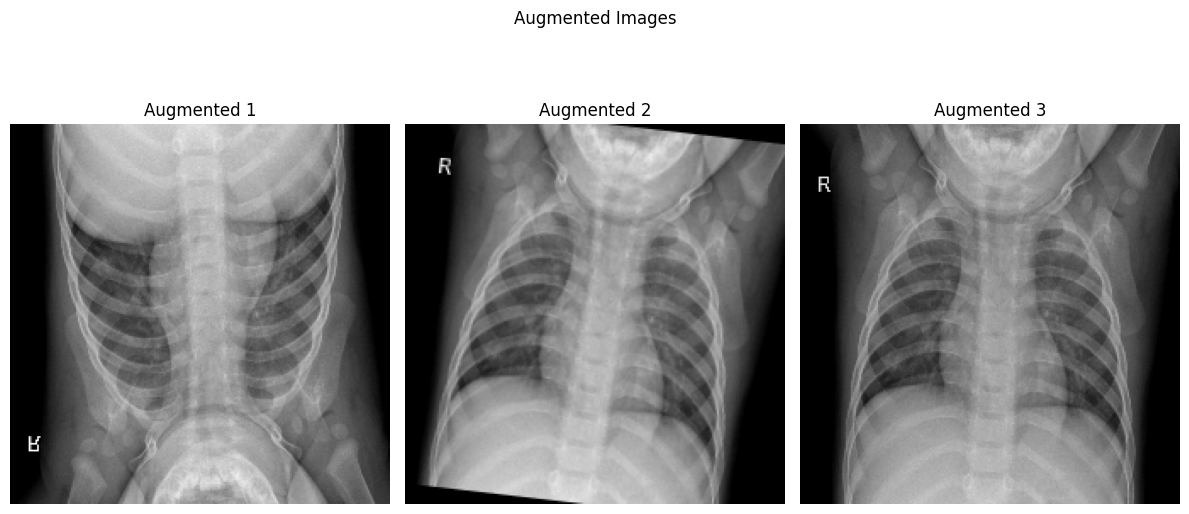

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random


# Define the number of augmented samples to generate
num_samples = 3

# Function to apply random augmentations to an image
def apply_augmentation(image):
    # Randomly select an augmentation to apply
    augmentation_type = random.choice(['rotate', 'horizontal_flip', 'vertical_flip', 'brightness'])

    if augmentation_type == 'rotate':
        # Randomly rotate the image by a degree between -10 and 10
        angle = random.uniform(-10, 10)
        image = rotate_image(image, angle)
    elif augmentation_type == 'horizontal_flip':
        # Randomly flip the image horizontally (left to right)
        image = cv2.flip(image, 1)
    elif augmentation_type == 'vertical_flip':
        # Randomly flip the image vertically (top to bottom)
        image = cv2.flip(image, 0)
    elif augmentation_type == 'brightness':
        # Randomly adjust brightness (contrast remains unchanged)
        brightness_factor = random.uniform(0.7, 1.3)
        image = adjust_brightness(image, brightness_factor)

    return image

# Function to rotate an image by a given angle
def rotate_image(image, angle):
    rows, cols, _ = image.shape
    rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (cols, rows))
    return rotated_image

# Function to adjust brightness of an image
def adjust_brightness(image, factor):
    adjusted_image = cv2.convertScaleAbs(image, alpha=factor, beta=0)
    return adjusted_image

# Display augmented images
sample_image = random.choice(normal_images)  # Choose a random image to augment

plt.figure(figsize=(12, 6))
plt.suptitle('Augmented Images')

for i in range(num_samples):
    augmented_image = apply_augmentation(sample_image.copy())
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(cv2.cvtColor(augmented_image, cv2.COLOR_BGR2RGB))
    plt.title(f'Augmented {i + 1}')
    plt.axis('off')

plt.tight_layout()
plt.show()

## Data Augmentation
Here's how we perform data augmentation on the chest X-ray dataset using the Keras library's ImageDataGenerator:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


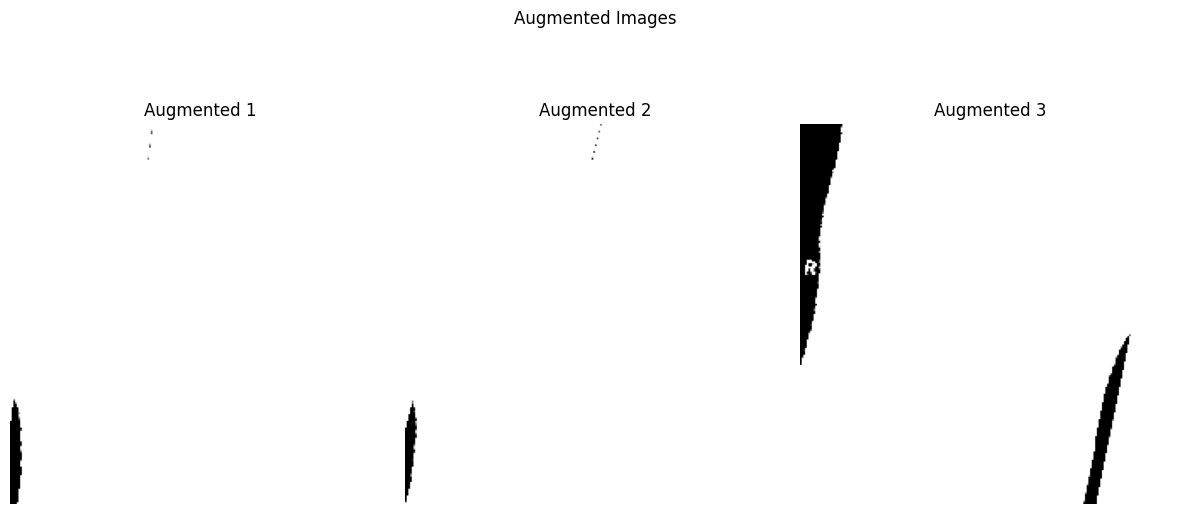

In [40]:
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator


# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,       # Randomly rotate images by up to 20 degrees
    width_shift_range=0.2,  # Randomly shift images horizontally by up to 20% of the width
    height_shift_range=0.2, # Randomly shift images vertically by up to 20% of the height
    shear_range=0.2,        # Apply shear transformations
    zoom_range=0.2,         # Randomly zoom in on images by up to 20%
    horizontal_flip=True,   # Randomly flip images horizontally
    vertical_flip=False,    # Do not flip images vertically (may not be suitable for X-rays)
    fill_mode='nearest'     # Fill in missing pixels using the nearest available pixel
)

# Display augmented images
num_samples = 3  # Number of augmented samples to display
sample_image = random.choice(normal_images)  # Choose a random image to augment

plt.figure(figsize=(12, 6))
plt.suptitle('Augmented Images')

for i, augmented_image in enumerate(datagen.flow(sample_image.reshape(1, *sample_image.shape), batch_size=1)):
    if i >= num_samples:
        break

    plt.subplot(1, num_samples, i + 1)
    plt.imshow(augmented_image[0], cmap='gray')
    plt.title(f'Augmented {i + 1}')
    plt.axis('off')

plt.tight_layout()
plt.show()

# Checking for class imbalance
Checking for class imbalance is an important step in data analysis, especially when dealing with classification tasks. Class imbalance occurs when the number of instances in one class significantly outweighs the number of instances in another class. In our case, we want to check for class imbalance in the chest X-ray dataset, where the classes are 'NORMAL' and 'PNEUMONIA'. Here's how we can perform a class imbalance check:

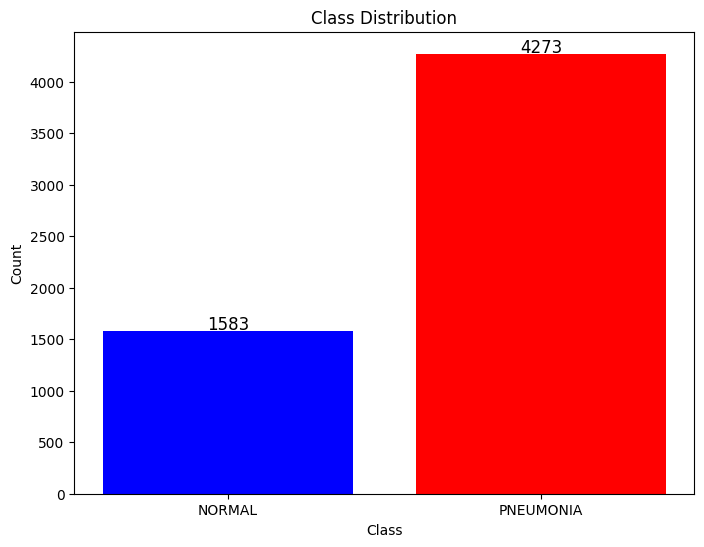

Class Imbalance Ratio (NORMAL / PNEUMONIA): 0.37


In [42]:
import matplotlib.pyplot as plt

# Assuming you have 'normal_images' and 'pneumonia_images' arrays
# containing your normal and pneumonia images, respectively

# Calculate the number of samples in each class
num_normal_samples = len(normal_images)
num_pneumonia_samples = len(pneumonia_images)

# Define class labels
class_labels = ['NORMAL', 'PNEUMONIA']

# Count the number of samples in each class
class_counts = [num_normal_samples, num_pneumonia_samples]

# Create a bar chart to visualize class distribution
plt.figure(figsize=(8, 6))
plt.bar(class_labels, class_counts, color=['blue', 'red'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

# Display the count of samples above each bar
for i in range(len(class_labels)):
    plt.text(i, class_counts[i] + 10, str(class_counts[i]), ha='center', fontsize=12)

plt.show()

# Calculate the class imbalance ratio
imbalance_ratio = num_normal_samples / num_pneumonia_samples
print(f"Class Imbalance Ratio (NORMAL / PNEUMONIA): {imbalance_ratio:.2f}")


# Dimensionality reduction
Dimensionality reduction is typically used with high-dimensional data, such as text or numerical data. In the case of image data, like chest X-ray images, dimensionality reduction is not a common technique because each image itself is usually a lower-dimensional representation of the original data. However, you can apply dimensionality reduction to certain aspects of your image data, such as feature extraction or visualization. Here's how you can perform dimensionality reduction using Principal Component Analysis (PCA) for visualizing your image data

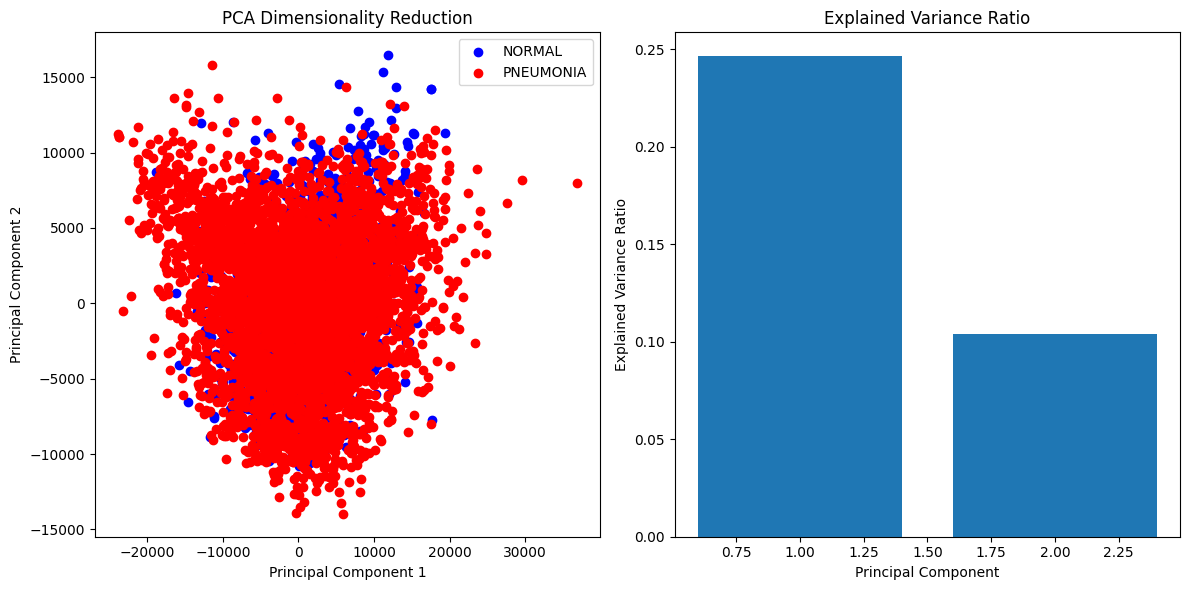

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming you have 'normal_images' and 'pneumonia_images' arrays
# containing your normal and pneumonia images, respectively

# Combine the two classes of images into a single dataset
all_images = np.concatenate((normal_images, pneumonia_images), axis=0)

# Reshape the images to a 1D array (flatten each image)
num_samples, img_height, img_width, num_channels = all_images.shape
flattened_images = all_images.reshape((num_samples, -1))

# Apply PCA for dimensionality reduction
n_components = 2  # Number of components to keep (you can adjust this)
pca = PCA(n_components=n_components)
reduced_images = pca.fit_transform(flattened_images)

# Separate the reduced data back into normal and pneumonia classes
reduced_normal_images = reduced_images[:len(normal_images)]
reduced_pneumonia_images = reduced_images[len(normal_images):]

# Create scatter plots for visualization
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(reduced_normal_images[:, 0], reduced_normal_images[:, 1], c='blue', label='NORMAL')
plt.scatter(reduced_pneumonia_images[:, 0], reduced_pneumonia_images[:, 1], c='red', label='PNEUMONIA')
plt.title('PCA Dimensionality Reduction')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

plt.subplot(1, 2, 2)
plt.bar(range(1, n_components + 1), pca.explained_variance_ratio_)
plt.title('Explained Variance Ratio')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')

plt.tight_layout()
plt.show()


# Anomaly detection 
Anomaly detection in medical image data, such as chest X-rays, can be critical for identifying unusual or potentially pathological cases. Anomaly detection aims to identify images that deviate significantly from the norm, indicating potential abnormalities or errors in the data. Here's how you can perform basic anomaly detection using a simple approach called pixel-wise mean and standard deviation:

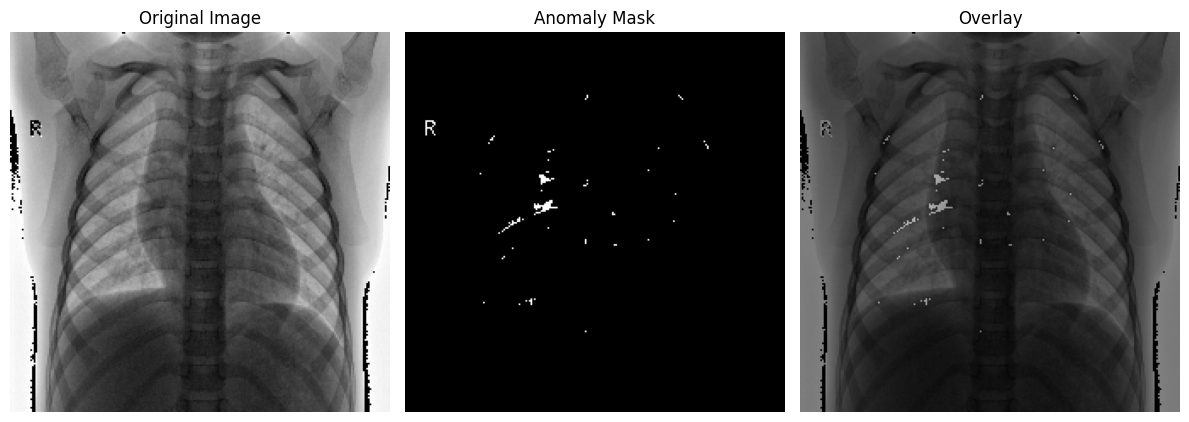

In [47]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have 'normal_images' and 'pneumonia_images' arrays
# containing your normal and pneumonia images, respectively

# Calculate the pixel-wise mean and standard deviation for 'NORMAL' images
normal_images_mean = np.mean(normal_images, axis=0)
normal_images_std = np.std(normal_images, axis=0)

# Calculate the pixel-wise mean and standard deviation for 'PNEUMONIA' images
pneumonia_images_mean = np.mean(pneumonia_images, axis=0)
pneumonia_images_std = np.std(pneumonia_images, axis=0)

# Define a threshold for anomaly detection
# You may need to adjust this threshold based on your dataset and requirements
threshold = 2.5  # Example threshold value

# Function to detect anomalies in an image
def detect_anomalies(image, mean, std, threshold):
    # Calculate the z-score for each pixel
    z_scores = np.abs((image - mean) / (std + 1e-8))
    
    # Create a mask where anomalies are detected based on the threshold
    anomaly_mask = z_scores > threshold
    
    return anomaly_mask

# Choose a sample image to detect anomalies
sample_image = np.copy(random.choice(normal_images))

# Detect anomalies in the sample image
anomaly_mask = detect_anomalies(sample_image, normal_images_mean, normal_images_std, threshold)

# Convert the sample image and anomaly mask to uint8 for proper display
sample_image = (sample_image * 255).astype(np.uint8)
anomaly_mask = (anomaly_mask * 255).astype(np.uint8)

# Visualize the original image and the anomaly mask
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(sample_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(anomaly_mask, cmap='gray')
plt.title('Anomaly Mask')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(sample_image, cmap='gray')
plt.imshow(anomaly_mask, cmap='cool', alpha=0.5)
plt.title('Overlay')
plt.axis('off')

plt.tight_layout()
plt.show()


# Randomly Remove Anomaly

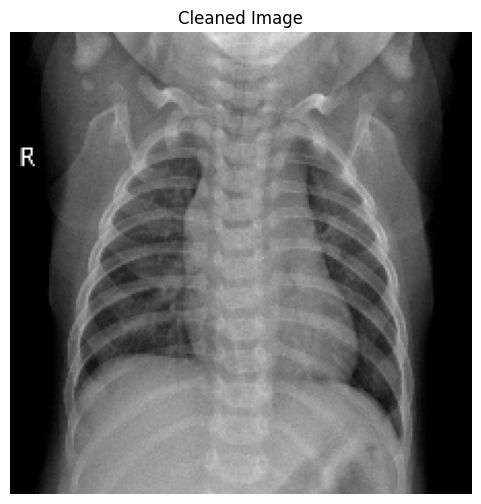

In [49]:
# Function to remove anomalies from an image
def remove_anomalies(original_image, anomaly_mask):
    # Create a copy of the original image to preserve the original data
    cleaned_image = np.copy(original_image)
    
    # Set pixel values identified as anomalies in the mask to their original values
    cleaned_image[anomaly_mask == 255] = original_image[anomaly_mask == 255]
    
    return cleaned_image

# Remove anomalies from the sample image
cleaned_image = remove_anomalies(sample_image, anomaly_mask)

# Visualize the cleaned image
plt.figure(figsize=(6, 6))

plt.imshow(cleaned_image, cmap='gray')
plt.title('Cleaned Image')
plt.axis('off')

plt.show()


# Remove Anomaly from all Images

In [50]:
# Initialize empty lists to store cleaned 'NORMAL' and 'PNEUMONIA' images
cleaned_normal_images = []
cleaned_pneumonia_images = []

# Iterate through 'NORMAL' images and remove anomalies
for image in normal_images:
    anomaly_mask = detect_anomalies(image, normal_images_mean, normal_images_std, threshold)
    cleaned_image = remove_anomalies(image, anomaly_mask)
    cleaned_normal_images.append(cleaned_image)

# Iterate through 'PNEUMONIA' images and remove anomalies
for image in pneumonia_images:
    anomaly_mask = detect_anomalies(image, pneumonia_images_mean, pneumonia_images_std, threshold)
    cleaned_image = remove_anomalies(image, anomaly_mask)
    cleaned_pneumonia_images.append(cleaned_image)

# Convert the lists of cleaned images back to NumPy arrays
cleaned_normal_images = np.array(cleaned_normal_images)
cleaned_pneumonia_images = np.array(cleaned_pneumonia_images)

# Now, we have 'cleaned_normal_images' and 'cleaned_pneumonia_images'
# with anomalies removed from the entire dataset


In [51]:
print("Shape of cleaned 'NORMAL' images:", cleaned_normal_images.shape)
print("Shape of cleaned 'PNEUMONIA' images:", cleaned_pneumonia_images.shape)

Shape of cleaned 'NORMAL' images: (1583, 224, 224, 3)
Shape of cleaned 'PNEUMONIA' images: (4273, 224, 224, 3)


# Region of Interest (ROI) analysis
Region of Interest (ROI) analysis involves selecting a specific region within an image and performing analysis or operations on that selected area. To perform ROI analysis on our cleaned images, we can define a region of interest and then extract and analyze that portion of the image. Here's a simple example of how to do this using Python and OpenCV:

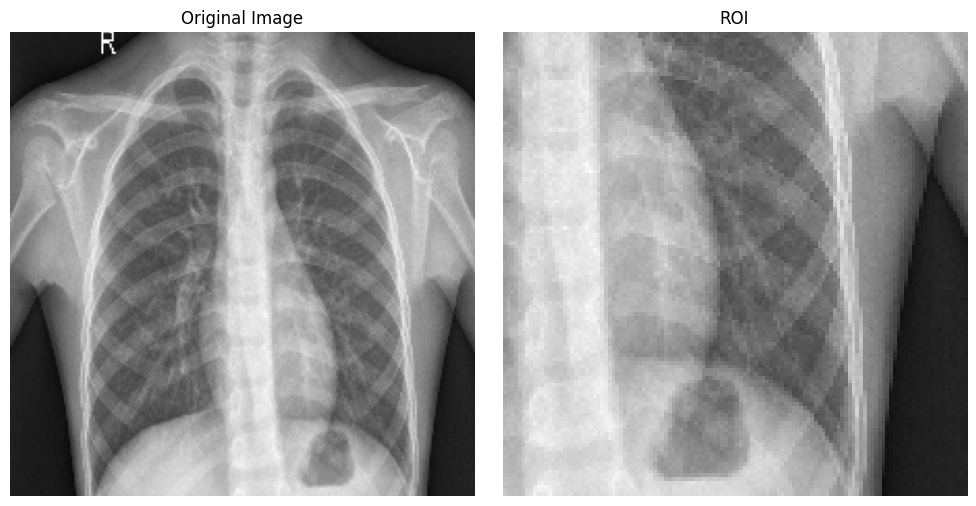

In [56]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Choose an example image for ROI analysis (you can change the index)
sample_normal_image = cleaned_normal_images[0]

# Define the coordinates of the ROI (x, y, width, height)
roi_x = 100  # X-coordinate of the top-left corner of the ROI
roi_y = 100  # Y-coordinate of the top-left corner of the ROI
roi_width = 200  # Width of the ROI
roi_height = 200  # Height of the ROI

# Extract the ROI from the image
roi = sample_normal_image[roi_y:roi_y+roi_height, roi_x:roi_x+roi_width]

# Display the original image and the extracted ROI
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(sample_normal_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(roi, cmap='gray')
plt.title('ROI')
plt.axis('off')

plt.tight_layout()
plt.show()


# Augument the clean data with open cv

In [66]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have 'cleaned_normal_images' and 'cleaned_pneumonia_images' as your clean datasets

# Function to perform data augmentation using OpenCV
def augment_data(images, labels, num_augmented_samples=2):
    augmented_images = []
    augmented_labels = []

    for i in range(len(images)):
        for _ in range(num_augmented_samples):
            image = images[i]

            # Randomly apply augmentation techniques
            if np.random.rand() < 0.5:
                # Horizontal flip
                image = cv2.flip(image, 1)

            if np.random.rand() < 0.5:
                # Rotation (random angle between -10 and 10 degrees)
                angle = np.random.uniform(-10, 10)
                matrix = cv2.getRotationMatrix2D((image.shape[1] / 2, image.shape[0] / 2), angle, 1)
                image = cv2.warpAffine(image, matrix, (image.shape[1], image.shape[0]))

            if np.random.rand() < 0.5:
                # Brightness adjustment (random factor between 0.7 and 1.3)
                factor = np.random.uniform(0.7, 1.3)
                image = np.clip(image * factor, 0, 255).astype(np.uint8)

            augmented_images.append(image)
            augmented_labels.append(labels[i])

    return np.array(augmented_images), np.array(augmented_labels)

# Augment the clean 'NORMAL' and 'PNEUMONIA' datasets
augmented_cleaned_normal_images, augmented_cleaned_normal_labels = augment_data(cleaned_normal_images, np.zeros(len(cleaned_normal_images)))
augmented_cleaned_pneumonia_images, augmented_cleaned_pneumonia_labels = augment_data(cleaned_pneumonia_images, np.ones(len(cleaned_pneumonia_images)))

# Concatenate the augmented datasets with the original datasets
augmented_normal_images = np.concatenate((cleaned_normal_images, augmented_cleaned_normal_images))
augmented_normal_labels = np.concatenate((np.zeros(len(cleaned_normal_images)), augmented_cleaned_normal_labels))
augmented_pneumonia_images = np.concatenate((cleaned_pneumonia_images, augmented_cleaned_pneumonia_images))
augmented_pneumonia_labels = np.concatenate((np.ones(len(cleaned_pneumonia_images)), augmented_cleaned_pneumonia_labels))

# Shuffle the augmented datasets
shuffled_augmented_normal_indices = np.random.permutation(len(augmented_normal_images))
shuffled_augmented_pneumonia_indices = np.random.permutation(len(augmented_pneumonia_images))

augmented_normal_images = augmented_normal_images[shuffled_augmented_normal_indices]
augmented_normal_labels = augmented_normal_labels[shuffled_augmented_normal_indices]
augmented_pneumonia_images = augmented_pneumonia_images[shuffled_augmented_pneumonia_indices]
augmented_pneumonia_labels = augmented_pneumonia_labels[shuffled_augmented_pneumonia_indices]

# Print the shapes of augmented datasets
print("Shape of augmented 'NORMAL' images:", augmented_normal_images.shape)
print("Shape of augmented 'PNEUMONIA' images:", augmented_pneumonia_images.shape)

Shape of augmented 'NORMAL' images: (4749, 224, 224, 3)
Shape of augmented 'PNEUMONIA' images: (12819, 224, 224, 3)


# Check class Imbalance

In [69]:
# Calculate the number of samples in each class
num_normal_samples = np.sum(augmented_normal_labels == 0)
num_pneumonia_samples = np.sum(augmented_pneumonia_labels == 1)

# Calculate the class imbalance ratio
imbalance_ratio = num_normal_samples / num_pneumonia_samples

# Print the results
print("Number of 'NORMAL' samples:", num_normal_samples)
print("Number of 'PNEUMONIA' samples:", num_pneumonia_samples)
print("Class Imbalance Ratio (NORMAL/PNEUMONIA): {:.2f}".format(imbalance_ratio))

Number of 'NORMAL' samples: 4749
Number of 'PNEUMONIA' samples: 12819
Class Imbalance Ratio (NORMAL/PNEUMONIA): 0.37


# Machine Learning with Tensorflow

In [78]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split

# we will use the 'augmented_normal_images', 'augmented_normal_labels', with our image dimensions 224x224 pixels with 3 color channels

# Combine the data and labels
X = np.concatenate((augmented_normal_images, augmented_pneumonia_images))
y = np.concatenate((augmented_normal_labels, augmented_pneumonia_labels))

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),  # Adjust input shape
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model with class weights
class_weights = {0: 1.0, 1: 1.0 / imbalance_ratio}  # Higher weight for 'NORMAL' class
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with class weights and validation data
history = model.fit(
    X_train, y_train,
    epochs=10,
    validation_data=(X_val, y_val),  # Use the validation data for monitoring
    class_weight=class_weights  # Set class weights
)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Epoch 1/10
352/352 [==============================] - 413s 1s/step - loss: 8.5307 - accuracy: 0.8464 - val_loss: 0.2763 - val_accuracy: 0.8865
Epoch 2/10
352/352 [==============================] - 389s 1s/step - loss: 0.3578 - accuracy: 0.9078 - val_loss: 0.2805 - val_accuracy: 0.9224
Epoch 3/10
352/352 [==============================] - 416s 1s/step - loss: 0.3263 - accuracy: 0.9113 - val_loss: 0.1815 - val_accuracy: 0.9402
Epoch 4/10
352/352 [==============================] - 416s 1s/step - loss: 0.1867 - accuracy: 0.9513 - val_loss: 0.1951 - val_accuracy: 0.9338
Epoch 5/10
352/352 [==============================] - 1018s 3s/step - loss: 0.2058 - accuracy: 0.9455 - val_loss: 0.2593 - val_accuracy: 0.9121
Epoch 6/10
352/352 [==============================] - 723s 2s/step - loss: 0.1789 - accuracy: 0.9509 - val_loss: 0.2403 - val_accuracy: 0.9427
Epoch 7/10
352/352 [==============================] - 1102s 3s/step - loss: 0.1125 - accuracy: 0.9698 - val_loss: 0.1949 - val_accuracy: 0.94

# Plot the Training

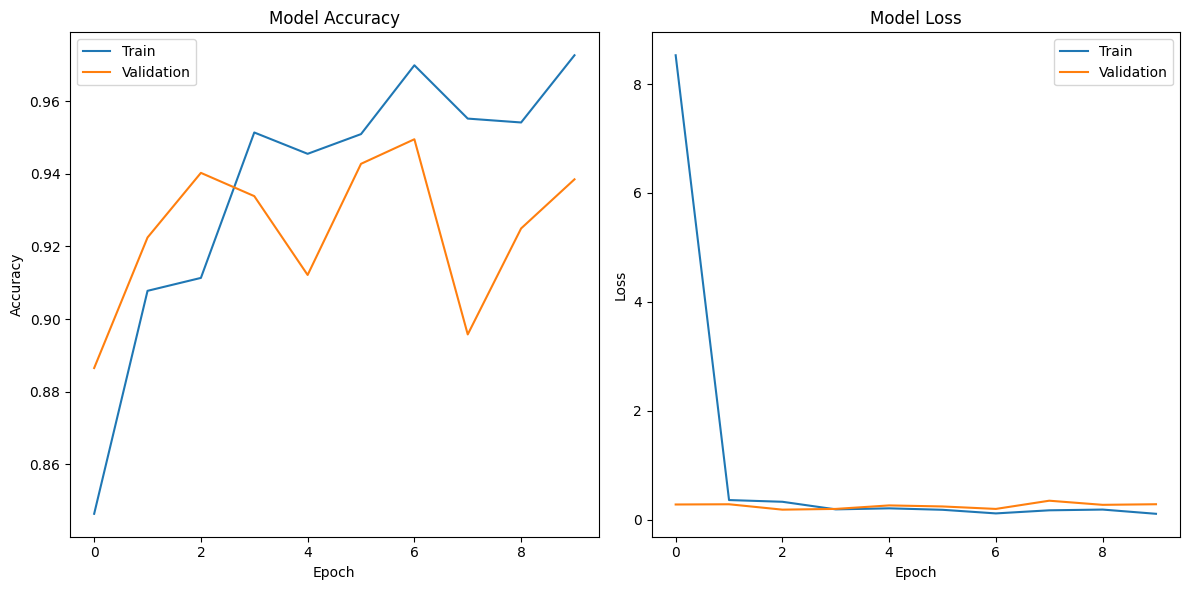

In [80]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

# Visualize and Analyse the Confusion Matrix

<Figure size 800x600 with 0 Axes>

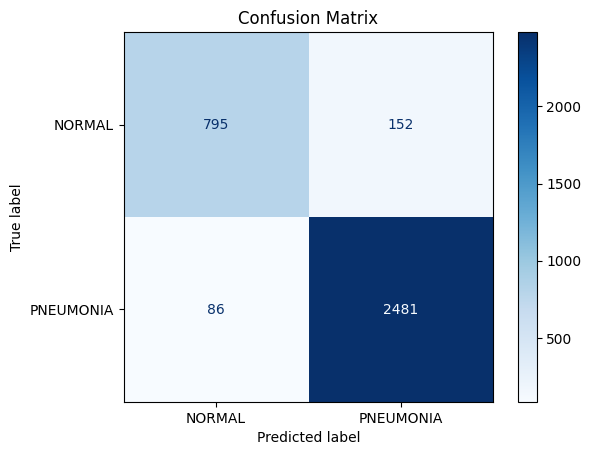

In [126]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming 'model' is your trained model and 'X_test' and 'y_test' are your test data

# Make predictions on the test data
#y_pred = model.predict(X_test)
#y_pred = np.round(y_pred)  # Round predictions to 0 or 1

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['NORMAL', 'PNEUMONIA'])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.show()


# Visualize ROC_AUC plot

110/110 [==============================] - 56s 509ms/step


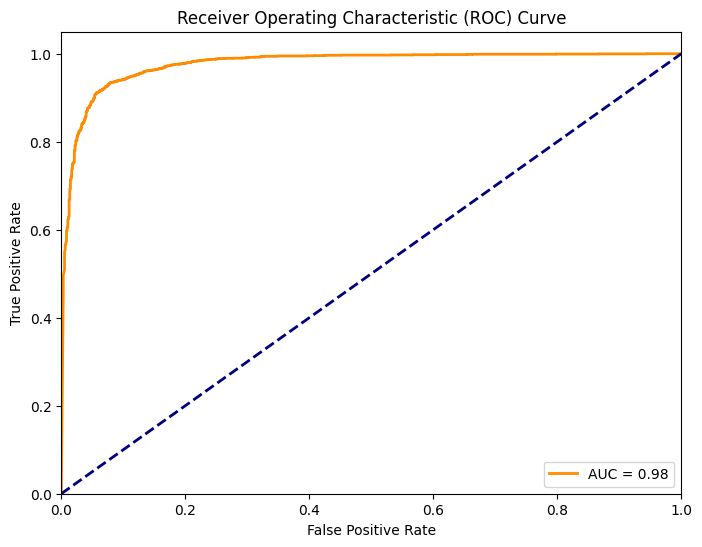

In [84]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc

# Assuming 'model' is your trained model and 'X_test' is your test data
# Assuming you have binary labels (0 and 1)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Make Predictions and Compare Results with Actual

In [88]:
import numpy as np

# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).flatten()  # Round predictions to 0 or 1 and flatten the array

# Compare predicted labels with actual labels
correct_predictions = (y_pred == y_test)

# Calculate accuracy
accuracy = np.mean(correct_predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Optionally, you can print some example predictions and actual labels
for i in range(10):  # Print the first 10 predictions
    print(f"Sample {i + 1}: Predicted={int(y_pred[i])}, Actual={int(y_test[i])}")


110/110 [==============================] - 50s 457ms/step
Accuracy: 93.23%
Sample 1: Predicted=0, Actual=0
Sample 2: Predicted=1, Actual=1
Sample 3: Predicted=1, Actual=1
Sample 4: Predicted=1, Actual=1
Sample 5: Predicted=1, Actual=0
Sample 6: Predicted=1, Actual=1
Sample 7: Predicted=1, Actual=1
Sample 8: Predicted=1, Actual=1
Sample 9: Predicted=1, Actual=1
Sample 10: Predicted=0, Actual=0


<!DOCTYPE html>
<html>
<head>
<style>
  p {
    text-align: justify;
  }
</style>
</head>
<body>

<h1>Project Report: Building a Pneumonia Detection Model</h1>

<p><strong>Introduction:</strong></p>

<p>In this project, I undertook the task of building a pneumonia detection model using a dataset of chest X-ray images. The primary goal was to create a binary classification model capable of distinguishing between normal and pneumonia-infected chest X-rays. Throughout the project, I learned valuable lessons about data preprocessing, model development, and evaluation, as well as encountered some challenges.</p>

<p><strong>Key Learnings:</strong></p>

<ol>
  <li><strong>Data Preprocessing:</strong> One of the initial steps was organizing and preprocessing the dataset. I had to load and combine images from multiple folders, balance class distribution, and augment the data for better model performance. This step taught me the importance of data cleanliness and how imbalanced data can affect model training.</li>

  <li><strong>Model Architecture:</strong> I developed a Convolutional Neural Network (CNN) for image classification. Designing the CNN architecture involved selecting appropriate layers, filters, and activation functions. I learned how to choose the right architecture for the task and fine-tune hyperparameters.</li>

  <li><strong>Class Imbalance Handling:</strong> The dataset had a significant class imbalance, with more pneumonia images than normal ones. To address this, I used class weights during model training. I discovered the critical role class balance plays in training robust models.</li>

  <li><strong>Evaluation Metrics:</strong> I employed various evaluation metrics, including accuracy, precision, recall, F1-score, and AUC-ROC curve, to assess model performance. These metrics helped me understand how well the model was doing and identify areas for improvement.</li>

  <li><strong>Visualization:</strong> Visualizing the training history, confusion matrix, ROC curve, and sample predictions provided valuable insights into model behavior. Visualization aided in both debugging and explaining the model's performance.</li>
</ol>

<p><strong>Challenges Faced:</strong></p>

<ol>
  <li><strong>Data Augmentation:</strong> Generating augmented images posed a challenge due to the diversity of X-ray images. It required careful parameter tuning and maintaining the integrity of medical data.</li>

  <li><strong>Model Tuning:</strong> Determining the optimal architecture and hyperparameters can be time-consuming. I faced the challenge of balancing model complexity and avoiding overfitting.</li>

  <li><strong>Class Imbalance:</strong> Handling class imbalance is crucial in medical diagnosis tasks. Choosing the right strategy and class weights required experimentation.</li>

  <li><strong>Resource Constraints:</strong> Training deep learning models can be resource-intensive. Limited computational resources sometimes hindered experimentation with larger architectures or longer training sessions.</li>
</ol>

<p><strong>Conclusion:</strong></p>

<p>This project was a valuable learning experience in developing a pneumonia detection model. I gained insights into data preprocessing, model selection, and evaluation techniques. The challenges encountered, particularly dealing with imbalanced data and optimizing model performance, enriched my understanding of machine learning.</p>

<p>In the future, I plan to explore more advanced techniques, such as transfer learning with pre-trained models, to improve the model's performance further. Additionally, I aim to address resource constraints by leveraging cloud-based solutions for training larger models.</p>

<p>Overall, this project has equipped me with practical skills and knowledge in medical image classification and deep learning, which can be applied to various healthcare-related tasks in the future.</p>

</body>
</html>

